---
# DECISION TREES
Sind gute Klassifizierer, wenn es darum geht, dass die Entscheidungsfindung max. interpretierbar sein soll.<br>
Die Hauptaufgabe liegt darin, den Informationsgehalt zu maximieren. Bei `binären` Bäumen finden vornehmlich<br>
drei Maße für die Bewertung der Impurity Verwendung:<br>
`1. Entropie`:<br>
    Wechselseitigkeit im Baum wird max. --> wie viele Objekte gehören zu Klasse 1, wie viele zu Klasse 2, usw. -> Entropie ist NULL, wenn alle Elemente zu nur einer Klasse gehören<br>
    Entropie wird hingegen max., wenn also Klassen gleich viele Objekte haben = Entropie ist max. wenn viele Infos zu allen Klassen vorhanden sind<br>
<br>
`2. GINI Koeffizient`:<br>
    Maß, in wieweit Wahrscheinlichkeit einer Fehlklassifizierung minimiert werden kann.<br>
    Ebenfalls wie Entropie maximal, wenn die Klassen perfekt durchgemischt sind.<br>
    `In der Praxis liefern Entropie und GINI Koeffizient sehr ähnliche Ergebnisse: oft kein Mehrwert sehr viel Zeit in die Auswertung dieser Impurity Kriterien zu stecken!`<br>
<br>
`3. Klassifikationsfehler`:<br>
nützliches Kriterium für das `Pruning` eines Entscheidungsbaumes (Zu hohe Tiefe des Baumes führt zu viel mehr Rechenaufwand und kann auch zu Überanpassung führen, weshalb man<br>
die Tiefe begrenzen sollte). Dieses Kriterium hat aber keinen so entscheidenden Einfluss auf die Konstruktion des Baumes, weshalb auch die Verteilung der Klassen usw. nicht so<br>
streng zu sehen sind (es ist weniger empfindlich auf die Änderung von Klassen)

---
## Um diese drei Kriterien besser visuell vergleichen zu können, ploten wir die Impurity-Indizes der Klasse 1 für das Wahrscheinlichkeitsintervall [0,1]
Den GINI-Koeffizienten skallieren wir auf 1/2, damit visuell klar wird, dass dieses zwischen der Entropie und dem Klassifikationsfehler liegt

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1- (1-p))

def entropy(p):
    return - p * np.log2(p) - (1-p) * (np.log2(1-p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent    = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*.5 if e else None for e in ent]
err    = [error(i) for i in x]

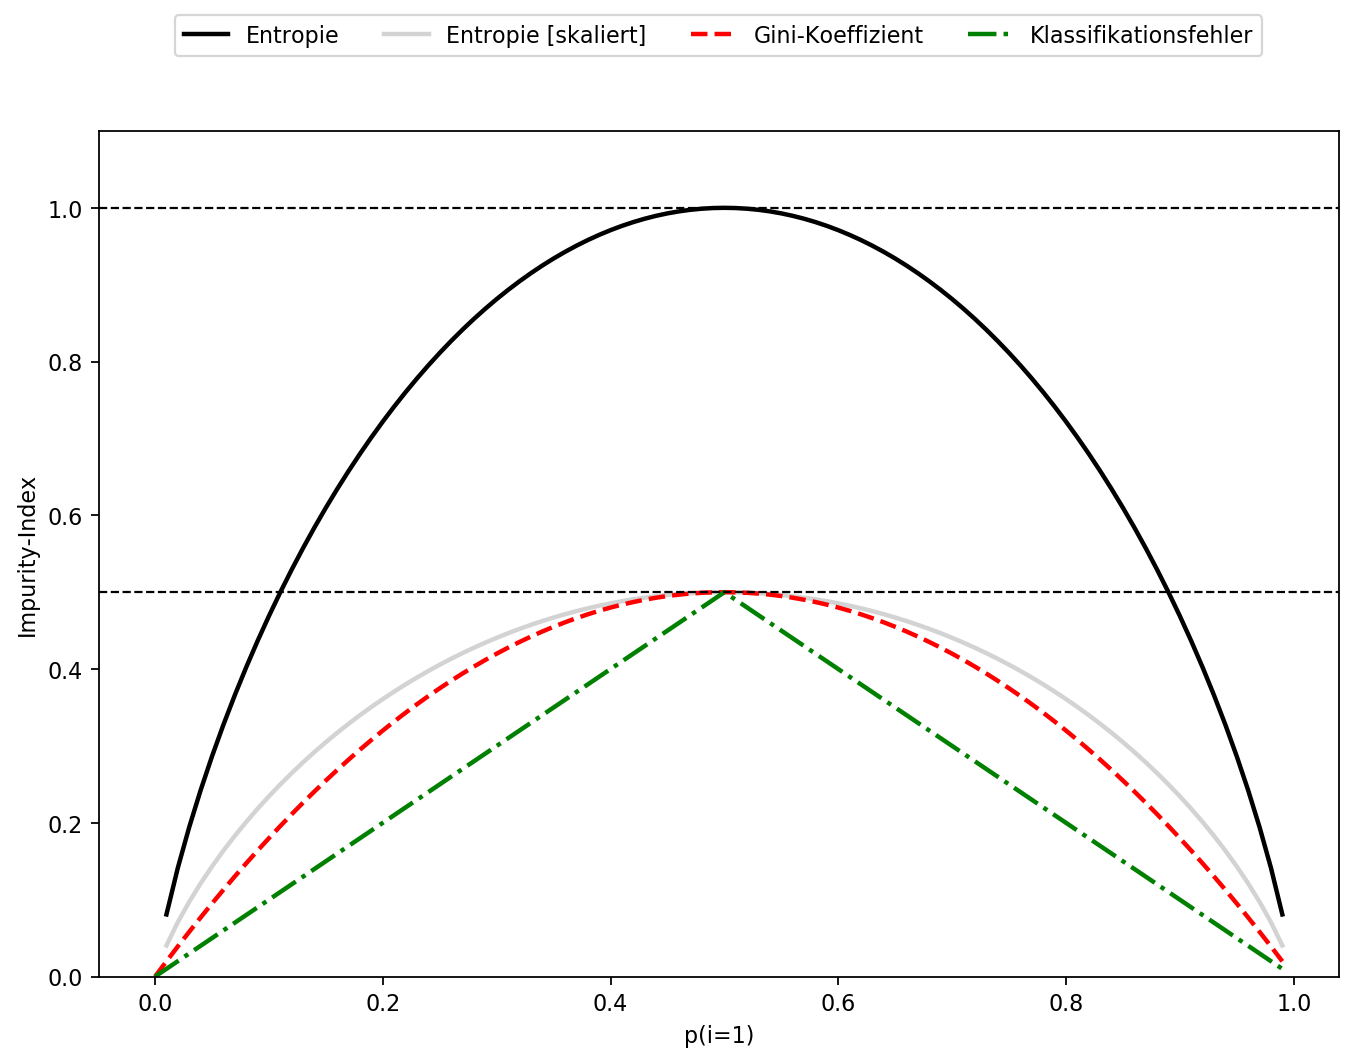

In [14]:
fig = plt.figure(figsize=(10,7), dpi=160)
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], ['Entropie', 'Entropie [skaliert]', 'Gini-Koeffizient', 'Klassifikationsfehler'], ['-', '-', '--', '-.'], ['black', 'lightgrey', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc="upper center", bbox_to_anchor=(.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity-Index')
plt.show()

---
# ANWENDUNG DECISION TREE AUF IRIS DATENSATZ
### Man sollte die Baumtiefe im Auge behalten, weil man sonst Probleme mit Überanpassung bekommen kann.